## MP Phase 1

**S11 - Group x**

**Submitted By:** <br>
&nbsp;&nbsp;&nbsp;&nbsp;**Chua Ching, Janine**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Ileto, Maxine**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Dytoc, Ayisha**<br>
&nbsp;&nbsp;&nbsp;&nbsp;**Tan, Jared**

# Introduction

## Target Task

In sports, soccer remains to be one of the world's most popular sports. Accurately predicting match results is a pursuit that intrigues both enthusiasts, analysts, and even the casual audience. The dataset under consideration provides a unique opportunity to explore this problem by focusing on the **classification task of determining whether the home team is winning or not given a set of features**.

This classification task holds significance for various applications, including live match analysis or strategic decision-making. With this in mind, the classifications to be developed would be the **K-Nearest Neighbors (KNN) model**, **binomial classification**, and **(neural network/naive bayes)**. 

# Dataset Description

## Brief Description

The dataset comprises 10,000 random snapshots, each representing a single timestamp during a soccer match. These snapshots encompass a range of essential features, offering a glimpse into the ongoing match dynamics. Key attributes for this dataset include the current minute of play, goals scored by each team, yellow and red cards issued, attacks attempted, dangerous attacks attempted, corners awarded, missed shots off target, missed shots on target, and possession percentages for both the home and away teams.

## Data Collection Process


## Dataset Features

The dataset contains a total of 20 variables (columns). The following are the descriptions of each variable in the dataset:

- **`uuid`**: The unique identifier of the snapshot
- **`current_minute`**: The current minute of the in-play match. Important: the 15 min half-time break is included, so a match will have a total of 105 min. A current_minute of 70 corresponds to the actual match time of 55.
- **`home_score`**: Goals scored by the home team as of this current_minute
- **`away_score`**:  Goals scored by the away team as of this current_minute
- **`home_yellow_cards`**: Yellow cards given to the home team as of this current_minute
- **`away_yellow_cards`**: Yellow cards given to the away team as of this current_minute
- **`home_red_cards`**: Red cards given to the home team as of this current_minute
- **`away_red_cards`**: Red cards given to the away team as of this current_minute
- **`home_attacks`**: Attacks attempted by the home team as of this current_minute
- **`away_attacks`**: Attacks attempted by the away team as of this current_minute
- **`home_dangerous_attacks`**: Dangerous attacks attempted by the home team as of this current_minute
- **`away_dangerous_attacks`**: Dangerous attacks attempted by the away team as of this current_minute
- **`home_corners`**: Corners awarded to the home team as of this current_minute
- **`away_corners`**: Corners awarded to the away team as of this current_minute
- **`home_off_target`**: Shots that didn't have to be cleared by the goalkeeper that were 
attempted to the home team as of this current_minute
- **`away_off_target`**: Shots that didn't have to be cleared by the goalkeeper that were 
attempted to the away team as of this current_minute
- **`home_on_target`**:  Shots that had to be cleared by the goalkeeper that were attempted to 
the home team as of this current_minute
- **`away_on_target`**: Shots that had to be cleared by the goalkeeper that were attempted to 
the away team as of this current_minute
- **`home_possession`**: How much ball possession in % did the home team have until this 
current_minute
- **`away_possession`**: How much ball possession in % did the away team have until this
current_minute

## Features to be Used

Out of the 20 features in the dataset, 18 seem to be usable as input features for a classification model:

1. **`home_score`**
2. **`away_score`**
3. **`home_yellow_cards`**
4. **`away_yellow_cards`**
5. **`home_red_cards`**
6. **`away_red_cards`**
7. **`home_attacks`**
8. **`away_attacks`**
9. **`home_dangerous_attacks`**
10. **`away_dangerous_attacks`**
11. **`home_corners`**
12. **`away_corners`**
13. **`home_off_target`**
14. **`away_off_target`**
15. **`home_on_target`**
16. **`away_on_target`**
17. **`home_possession`**
18. **`away_possession`**

Analyzing the following, it is also possible to consolidate pairs into one feature:
1. **`home_is_winning`** - A binary indicator (0 or 1) representing whether the home team is winning or not, comparing the `home_score` and the `away_score`. `score_difference` will not be used as this is too much of a giveaway for if a team is winning or not.
2. **`yellow_cards_difference`** - The difference between the home `home_yellow_cards` and the away `away_yellow_cards`.
3. **`red_cards_difference`** - The difference between the home `home_red_cards` and the away `away_red_cards`.
4. **`attacks_difference`** - The difference between the home `home_attacks` and the away `away_attacks`.
5. **`dangerous_attacks_difference`** - The difference between the home `home_dangerous_attacks` and the away `away_dangerous_attacks`.
6. **`corners_difference`** - The difference between the home `home_corners` and the away `away_corners`.
7. **`off_target_difference`** - The difference between the home `home_off_target` and the away `away_off_target`.
8. **`on_target_difference`** - The difference between the home `home_on_target` and the away `away_on_target`.
9. **`home_possesion`** - Because `home_possession` and `away_possession` percentages directly mirror the distribution of possesion between the home and away teams during a soccer match, we only need one, `home_possesion` is used as all differences is the difference of the home team to the away team (home statistic minus away statistic).

By consolidating these paired features, it can reduce the dimensionality of your dataset. This is particularly useful when dealing with a large number of features, as it can simplify the model. 

The following features were not included:
1. **`uuid`** - While this feature serves as a unique identifier for preprocessing, it won't be used in the machine learning model. It's not an indication of anything and will not be considered for the classification model.
2. **`current_minute`** - This feature will be still be used for preprocessing, however it won't be used as an input feature for the machine learning model because there may be a lack of a linear relationship between the minute of play and the outcome of the match. Of course, with a higher minute, stats become higher, but this is tricky as as soccer match dynamics are inherently non-linear and context-dependent. Moreover, this stat is not controlled by either team.
3. **`home_score`** - The reason why this feature will not be used is because it will be as good as giving the model the answer. If the `home_score` is greater than the `away_score`, than the home team is obviously winning.
4. **`away_score`** - The same as the reasons for **`home_score`**.

# List of requirements

List all python libraries and modules used

In [1]:
# Python Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Data Preprocessing and Cleaning

The data used in this project is stored in the `sports.csv` file. This data will be stored in a variable called `df`.

Below is a sample of the first 5 rows of the dataset.

In [2]:
df = pd.read_csv('sports.csv')
df.head()

,uuid,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,...,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,2f9dd904-8d9d-4aa0-a9d9-4e0f3e50d742,94,1,2,0,0,0,0,39,45,...,26,4,1,4,0,4,6,48,52,1
1,869c1420-9153-4d73-8d79-5db31a8a80a4,91,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,50,50,1
2,549e25a3-4c93-459d-b115-fb303273c78a,3,0,0,0,0,0,0,3,1,...,0,0,0,0,0,0,0,62,38,4
3,287b4be5-9163-4e2e-895d-d11052a97410,17,0,0,1,0,0,0,41,46,...,25,1,0,0,2,0,0,55,45,2
4,a607da6a-d6b2-4652-b7a5-6c8e4b61c2b8,76,1,0,1,0,0,0,69,78,...,46,1,1,0,3,4,4,45,55,0


In the following section, Exploratory Data Analysis (EDA), we want to explore which features can affect whether or not the home team is winning. 
- remove uuid since this is irrelevant to the computation

In [3]:
df = df.drop('uuid', axis=1)
df.head()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
0,94,1,2,0,0,0,0,39,45,29,26,4,1,4,0,4,6,48,52,1
1,91,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,50,1
2,3,0,0,0,0,0,0,3,1,1,0,0,0,0,0,0,0,62,38,4
3,17,0,0,1,0,0,0,41,46,11,25,1,0,0,2,0,0,55,45,2
4,76,1,0,1,0,0,0,69,78,21,46,1,1,0,3,4,4,45,55,0


We will now begin cleaning the data.

First, we will check if there are any null or missing values.

In [4]:
df.isnull().any()

current_minute            False
home_score                False
away_score                False
home_yellow_cards         False
away_yellow_cards         False
home_red_cards            False
away_red_cards            False
home_attacks              False
away_attacks              False
home_dangerous_attacks    False
away_dangerous_attacks    False
home_corners              False
away_corners              False
home_off_target           False
away_off_target           False
home_on_target            False
away_on_target            False
home_possession           False
away_possession           False
final_delta               False
dtype: bool

Based on the output above, we can see that they are all `False`, indicating that there are no null or missing values.

We will next check if the data types of the variables are consistent.

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype
---  ------                  --------------  -----
 0   current_minute          7000 non-null   int64
 1   home_score              7000 non-null   int64
 2   away_score              7000 non-null   int64
 3   home_yellow_cards       7000 non-null   int64
 4   away_yellow_cards       7000 non-null   int64
 5   home_red_cards          7000 non-null   int64
 6   away_red_cards          7000 non-null   int64
 7   home_attacks            7000 non-null   int64
 8   away_attacks            7000 non-null   int64
 9   home_dangerous_attacks  7000 non-null   int64
 10  away_dangerous_attacks  7000 non-null   int64
 11  home_corners            7000 non-null   int64
 12  away_corners            7000 non-null   int64
 13  home_off_target         7000 non-null   int64
 14  away_off_target         7000 non-null   int64
 15  home_on_target       

Based on the output, we can see that all items in the data are non-null and have the integer data type.

We will now check if there are any default values within the data, which can be indicated by values that go beyond the data range (ex. below the minimum values or above the maximum)

In [6]:
df.describe()

,current_minute,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,final_delta
count,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000,7000.000000
mean,59.491571,0.796000,0.623143,0.522429,0.603143,0.009286,0.015714,46.365429,43.325143,27.611429,24.201286,2.377714,1.994286,3.067857,2.592286,2.172143,1.796000,51.584286,48.412571,1.416857
std,35.827892,1.070503,0.923248,0.922212,1.018021,0.097399,0.125520,36.004908,33.428276,22.977844,20.457007,2.464647,2.197746,3.157366,2.747621,2.320374,2.026002,10.532584,10.534579,1.419035
min,-348.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.000000
25%,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,14.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,46.000000,42.000000,0.000000
50%,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,43.000000,41.000000,25.000000,21.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,51.000000,49.000000,1.000000
75%,88.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,71.000000,67.000000,42.000000,36.000000,4.000000,3.000000,5.000000,4.000000,3.000000,3.000000,58.000000,54.000000,2.000000
max,583.000000,8.000000,9.000000,8.000000,8.000000,2.000000,2.000000,255.000000,183.000000,134.000000,140.000000,16.000000,18.000000,24.000000,18.000000,22.000000,19.000000,100.000000,100.000000,10.000000


Based on the output above, we can note the following:
- The minimum value of **`current_minute`** is a negative value, while the maximum value goes beyond the total match time. 
- The minimum and maximum values of the remaining features are within the proper range.
- `home_possession` and `away_possession` are correctly within 0 and 100

Since for this project we will be predicting whether the home team is winning or losing, we would ideally want the match to have sufficient data to be able to accurately predict this. If the match has barely begun, there might not be enough data to create an accurate prediction, and this may also skew the training data.

With this, we will only use the match data for games that are either from the break time (eg. the middle of the game) or in the game's second half.

In [7]:
df = df[ df['current_minute'] >= 45 ]
df = df[ df['current_minute'] <= 105 ]
df['current_minute'].describe()

count    4112.000000
mean       82.137889
std        14.433778
min        45.000000
25%        73.000000
50%        83.000000
75%        94.000000
max       105.000000
Name: current_minute, dtype: float64

In [8]:
len(df)

4112

As shown, the values for **`current_minute`** are now within the appropriate time range.

This now leaves us with 4112 items in the dataset.

We will now drop any duplicated data.

In [9]:
df.drop_duplicates()
len(df)

4112

The number of rows in the dataset did not change, indicating that there were no duplicates.

Lastly, since we are only checking whether or not the home team is winning, we will remove any draw games from the dataset. This is indicated by games where the number of points of the home and away team are equal.

In [10]:
df = df[ (df['home_score'] != df['away_score']) ]
len(df)

2824

This now leaves us with 2824 items in the dataset.

With the data cleaned, we will now create columns for the extra features that will be used in this project. Since we will need to determine whether or not the home team is winning, we can create an extra variable named **`home_is_winning`**, which will be a boolean variable of whether or not the home team's score is higher than the away team's.

As shown in the dataset, a majority of the variables come in pairs, with one corresponding to the home team and the other to the away team. For the remaining features used, we will merge these pairs into a single feature, denoted by the difference of the home team's statistic and the away team's statistic. This will be done to simplify the features used into a single variable, which can make the modelling process easier to perform.

Below is an explanation of the extra features that will be added:
1. **`yellow_cards_difference`** - The difference between the home `home_yellow_cards` and the away `away_yellow_cards`.
2. **`red_cards_difference`** - The difference between the home `home_red_cards` and the away `away_red_cards`.
3. **`attacks_difference`** - The difference between the home `home_attacks` and the away `away_attacks`.
4. **`dangerous_attacks_difference`** - The difference between the home `home_dangerous_attacks` and the away `away_dangerous_attacks`.
5. **`corners_difference`** - The difference between the home `home_corners` and the away `away_corners`.
6. **`off_target_difference`** - The difference between the home `home_off_target` and the away `away_off_target`.
7. **`on_target_difference`** - The difference between the home `home_on_target` and the away `away_on_target`.
8. **`home_possesion`** - Because `home_possession` and `away_possession` percentages directly mirror the distribution of possesion between the home and away teams during a soccer match, we only need one, `home_possesion` is used as all differences is the difference of the home team to the away team (home statistic minus away statistic).

We will no longer need the current_minute feature (as explained in the previous section) and final_delta (because it is not explained in the dataset).

In [11]:
df = df.drop('current_minute', axis=1)
df = df.drop('final_delta', axis=1)

In [12]:
# Add home_is_winning feature
create_new_column = lambda row: 1 if (row["home_score"] > row["away_score"]) else 0
added_column = df.apply(create_new_column, axis=1)
df["home_is_winning"] = added_column
df.head()

,home_score,away_score,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,home_is_winning
0,1,2,0,0,0,0,39,45,29,26,4,1,4,0,4,6,48,52,0
1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,50,50,1
4,1,0,1,0,0,0,69,78,21,46,1,1,0,3,4,4,45,55,1
5,2,0,0,0,0,0,87,72,40,35,3,2,4,4,3,3,50,50,1
8,0,2,0,0,0,0,27,41,20,31,2,2,1,3,1,4,36,64,0


Now that we have used the `home_score` and the `away_score` to create the `home_is_winning` output, then we can remove them (as explained in the previous section).

In [13]:
df = df.drop('home_score', axis=1)
df = df.drop('away_score', axis=1)

Now, let's replace the original features in the dataset with the paired features identified.

In [14]:
def add_difference_col(df, home_var, away_var, new_var):
    # create new column
    create_new_column = lambda row: row[home_var] - row[away_var]
    added_column = df.apply(create_new_column, axis=1)
    # add new column
    df[new_var] = added_column

    return df

In [15]:
cols = list(df.columns)

new_cols = ['yellow_cards_difference',
            'red_cards_difference',
            'attacks_difference',
            'dangerous_attacks_difference',
            'corners_difference',
            'off_target_difference',
            'on_target_difference'
           ]

print("New columns:")
j = 0
for i in range(0, len(cols) - 3, 2):
    print(f'{cols[i]}  -  {cols[i+1]}  =  {new_cols[j]}')
    # add the new columns
    df_pair = add_difference_col(df, cols[i], cols[i+1], new_cols[j])
    j += 1

df_pair.head()

New columns:
home_yellow_cards  -  away_yellow_cards  =  yellow_cards_difference
home_red_cards  -  away_red_cards  =  red_cards_difference
home_attacks  -  away_attacks  =  attacks_difference
home_dangerous_attacks  -  away_dangerous_attacks  =  dangerous_attacks_difference
home_corners  -  away_corners  =  corners_difference
home_off_target  -  away_off_target  =  off_target_difference
home_on_target  -  away_on_target  =  on_target_difference


,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,...,home_possession,away_possession,home_is_winning,yellow_cards_difference,red_cards_difference,attacks_difference,dangerous_attacks_difference,corners_difference,off_target_difference,on_target_difference
0,0,0,0,0,39,45,29,26,4,1,...,48,52,0,0,0,-6,3,3,4,-2
1,0,0,0,0,0,0,0,0,0,0,...,50,50,1,0,0,0,0,0,0,0
4,1,0,0,0,69,78,21,46,1,1,...,45,55,1,1,0,-9,-25,0,-3,0
5,0,0,0,0,87,72,40,35,3,2,...,50,50,1,0,0,15,5,1,0,0
8,0,0,0,0,27,41,20,31,2,2,...,36,64,0,0,0,-14,-11,0,-2,-3


You can now see that the new dataframe has the added columns.

You will notice that the `home_possession` and `away_possession` features were not modified. Since these are percentages that, when added, are equal to 100, there is no need to get their difference. With that, we will drop the `away_possession` column.

In [16]:
# df = df.drop('away_possession', axis=1)

We will also move the `home_is_winning` feature to the final column so that the data is easier to visualize.

In [17]:
col = df.pop('home_is_winning')
df.insert(len(df.columns), 'home_is_winning', col)
df.head()

,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,...,home_possession,away_possession,yellow_cards_difference,red_cards_difference,attacks_difference,dangerous_attacks_difference,corners_difference,off_target_difference,on_target_difference,home_is_winning
0,0,0,0,0,39,45,29,26,4,1,...,48,52,0,0,-6,3,3,4,-2,0
1,0,0,0,0,0,0,0,0,0,0,...,50,50,0,0,0,0,0,0,0,1
4,1,0,0,0,69,78,21,46,1,1,...,45,55,1,0,-9,-25,0,-3,0,1
5,0,0,0,0,87,72,40,35,3,2,...,50,50,0,0,15,5,1,0,0,1
8,0,0,0,0,27,41,20,31,2,2,...,36,64,0,0,-14,-11,0,-2,-3,0


We will now normalize the numerical data used in the dataset. We will do this for all variables except for `home_is_winning` since this is the output.

In [18]:
columns_to_normalize = list(df.columns)
columns_to_normalize.remove('home_is_winning')
columns_to_normalize.remove('home_possession')
columns_to_normalize.remove('away_possession')
columns_to_normalize

['home_yellow_cards',
 'away_yellow_cards',
 'home_red_cards',
 'away_red_cards',
 'home_attacks',
 'away_attacks',
 'home_dangerous_attacks',
 'away_dangerous_attacks',
 'home_corners',
 'away_corners',
 'home_off_target',
 'away_off_target',
 'home_on_target',
 'away_on_target',
 'yellow_cards_difference',
 'red_cards_difference',
 'attacks_difference',
 'dangerous_attacks_difference',
 'corners_difference',
 'off_target_difference',
 'on_target_difference']

In [19]:
df[columns_to_normalize] = df[columns_to_normalize].apply(lambda x: (x - x.min()) / (x.max() - x.min()))
df.head()

,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,...,home_possession,away_possession,yellow_cards_difference,red_cards_difference,attacks_difference,dangerous_attacks_difference,corners_difference,off_target_difference,on_target_difference,home_is_winning
0,0.000000,0.0,0.0,0.0,0.152941,0.245902,0.219697,0.185714,0.285714,0.055556,...,48,52,0.5,0.333333,0.460251,0.461538,0.65625,0.548387,0.484848,0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,50,50,0.5,0.333333,0.485356,0.443787,0.56250,0.419355,0.545455,1
4,0.142857,0.0,0.0,0.0,0.270588,0.426230,0.159091,0.328571,0.071429,0.055556,...,45,55,0.6,0.333333,0.447699,0.295858,0.56250,0.322581,0.545455,1
5,0.000000,0.0,0.0,0.0,0.341176,0.393443,0.303030,0.250000,0.214286,0.111111,...,50,50,0.5,0.333333,0.548117,0.473373,0.59375,0.419355,0.545455,1
8,0.000000,0.0,0.0,0.0,0.105882,0.224044,0.151515,0.221429,0.142857,0.111111,...,36,64,0.5,0.333333,0.426778,0.378698,0.56250,0.354839,0.454545,0


Now let's seperate the two datasets for convinience, `df` with the original features and `df_pair` with the paired features.

In [20]:
df_features = [
    'home_yellow_cards', 'away_yellow_cards',
    'home_red_cards', 'away_red_cards', 'home_attacks', 'away_attacks',
    'home_dangerous_attacks', 'away_dangerous_attacks', 'home_corners',
    'away_corners', 'home_off_target', 'away_off_target', 'home_on_target',
    'away_on_target', 'home_possession', 'away_possession', 'home_is_winning'
]

df_pair_features = [
    'yellow_cards_difference', 'red_cards_difference',
    'attacks_difference', 'dangerous_attacks_difference', 'corners_difference',
    'off_target_difference', 'on_target_difference', 'home_possession',
    'home_is_winning'
]


df_pair = df[df_pair_features]
df = df[df_features]

In [21]:
df.head()

,home_yellow_cards,away_yellow_cards,home_red_cards,away_red_cards,home_attacks,away_attacks,home_dangerous_attacks,away_dangerous_attacks,home_corners,away_corners,home_off_target,away_off_target,home_on_target,away_on_target,home_possession,away_possession,home_is_winning
0,0.000000,0.0,0.0,0.0,0.152941,0.245902,0.219697,0.185714,0.285714,0.055556,0.166667,0.000000,0.181818,0.315789,48,52,0
1,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50,50,1
4,0.142857,0.0,0.0,0.0,0.270588,0.426230,0.159091,0.328571,0.071429,0.055556,0.000000,0.166667,0.181818,0.210526,45,55,1
5,0.000000,0.0,0.0,0.0,0.341176,0.393443,0.303030,0.250000,0.214286,0.111111,0.166667,0.222222,0.136364,0.157895,50,50,1
8,0.000000,0.0,0.0,0.0,0.105882,0.224044,0.151515,0.221429,0.142857,0.111111,0.041667,0.166667,0.045455,0.210526,36,64,0


In [22]:
df_pair.head()

,yellow_cards_difference,red_cards_difference,attacks_difference,dangerous_attacks_difference,corners_difference,off_target_difference,on_target_difference,home_possession,home_is_winning
0,0.5,0.333333,0.460251,0.461538,0.65625,0.548387,0.484848,48,0
1,0.5,0.333333,0.485356,0.443787,0.56250,0.419355,0.545455,50,1
4,0.6,0.333333,0.447699,0.295858,0.56250,0.322581,0.545455,45,1
5,0.5,0.333333,0.548117,0.473373,0.59375,0.419355,0.545455,50,1
8,0.5,0.333333,0.426778,0.378698,0.56250,0.354839,0.454545,36,0


Now we have two dataframes, both have been cleaned and normalized, seperated from each other. One contains the dataset's original 18 features, the other with 9 features that have been paired correspondingly.

# Exploratory Data Analysis

What is the correlation between different features, especially the selected key features and the target variable (home_is_winning)? Are there any strong correlations between possession percentages (home_possession and away_possession) and the outcome?

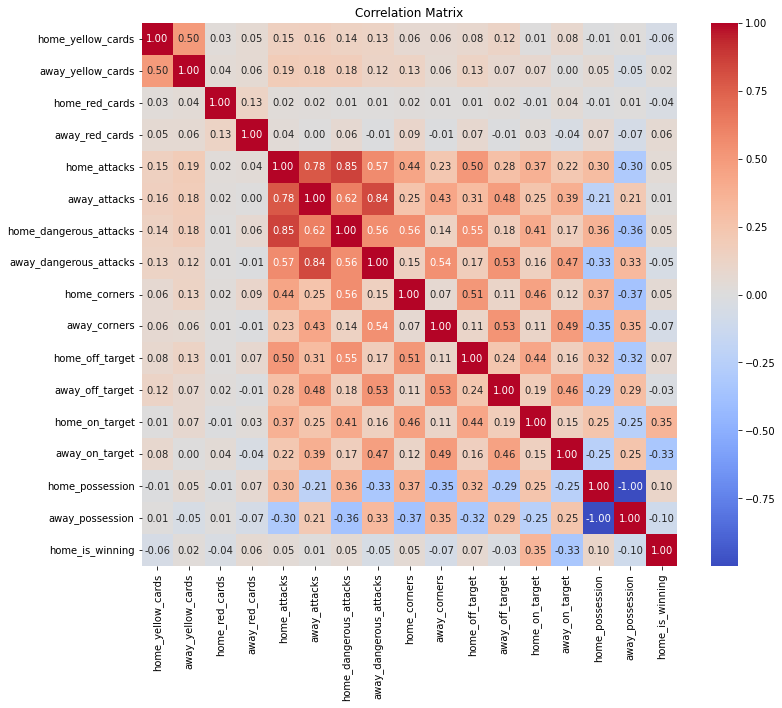

In [23]:
correlation_matrix = df[df_features].corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

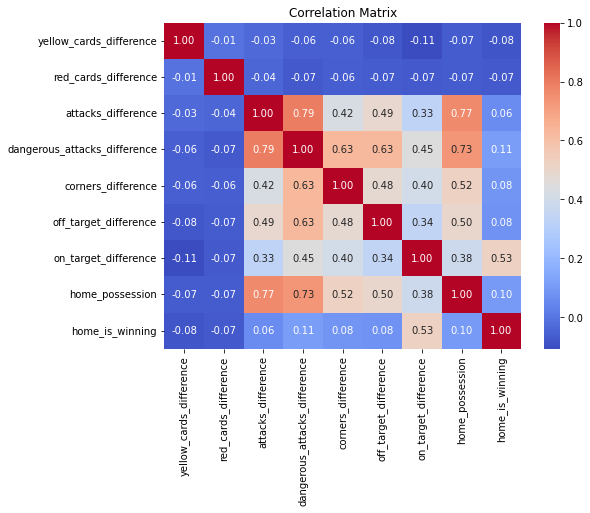

In [24]:
correlation_matrix = df_pair[df_pair_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

A positive correlation of 0.53 between `home_is_winning` and `on_target_difference` indicates that an increase in the difference in on-target attempts is moderately associated with an increased likelihood of the home team winning.

A strong negative correlation of -0.79 between `attacks_difference` and `dangerous_attacks_difference` suggests a significant negative relationship. As the difference in total attacks increases, the difference in dangerous attacks tends to decrease, and vice versa.

A positive correlation of 0.33 between `attacks_difference` and `on_target_difference` indicates a weak positive relationship. An increase in the difference in total attacks is weakly associated with a slight increase in the difference in on-target attempts.

A moderate positive correlation of 0.45 between `dangerous_attacks_difference` and `on_target_difference` suggests a moderate positive relationship. An increase in the difference in dangerous attacks is moderately associated with an increase in the difference in on-target attempts.

How many matches in the dataset resulted in the home team winning?

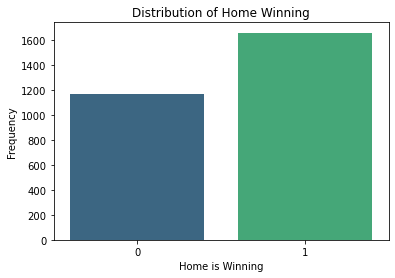

Is the home team winning?
 1    1659
0    1165
Name: home_is_winning, dtype: int64


In [25]:
plt.figure(figsize=(6, 4))
sns.countplot(x='home_is_winning', data=df, palette='viridis')
plt.title('Distribution of Home Winning')
plt.xlabel('Home is Winning')
plt.ylabel('Frequency')

plt.show()

print("Is the home team winning?\n", df['home_is_winning'].value_counts())

In exploring the distribution of the home team winning, it was found that the home team wins more than the away team, being 494 more wins. This may indicate a class imbalance. However, it is also worth noting that being the Home team has inherent advantages which may not be found in the data such as being more familiar with the playing environment, crowd support, and reduced travel-related fatigue. Therefore, the apparent class imbalance may be a reflection of these inherent advantages rather than a data-related issue. Considering these factors is crucial in interpreting the results accurately and deciding on an appropriate strategy for modeling

How does possession percentage vary between home and away teams, and how does it relate to home team winning?

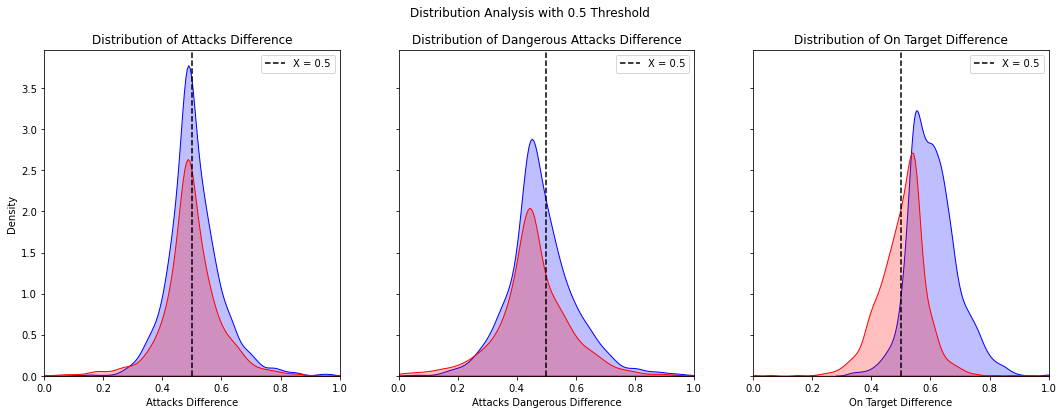

In [26]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# Plot for 'attacks_difference'
sns.kdeplot(data=df_pair, x='attacks_difference', fill=True, hue='home_is_winning', ax=axes[0], palette={True: 'blue', False: 'red'})
axes[0].set_title('Distribution of Attacks Difference')
axes[0].set_xlabel('Attacks Difference')
axes[0].set_ylabel('Density')
axes[0].set_xlim(left=min(df_pair['attacks_difference']), right=max(df_pair['attacks_difference']))
axes[0].axvline(x=0.5, color='black', linestyle='--', label='X = 0.5')
axes[0].legend()

# Plot for 'dangerous_attacks_difference'
sns.kdeplot(data=df_pair, x='dangerous_attacks_difference', fill=True, hue='home_is_winning', ax=axes[1], palette={True: 'blue', False: 'red'})
axes[1].set_title('Distribution of Dangerous Attacks Difference')
axes[1].set_xlabel('Attacks Dangerous Difference')
axes[1].set_ylabel('')
axes[1].set_xlim(left=min(df_pair['dangerous_attacks_difference']), right=max(df_pair['dangerous_attacks_difference']))
axes[1].axvline(x=0.5, color='black', linestyle='--', label='X = 0.5')
axes[1].legend()

# Plot for 'on_target_difference'
sns.kdeplot(data=df_pair, x='on_target_difference', fill=True, hue='home_is_winning', ax=axes[2], palette={True: 'blue', False: 'red'})
axes[2].set_title('Distribution of On Target Difference')
axes[2].set_xlabel('On Target Difference')
axes[2].set_ylabel('')
axes[2].set_xlim(left=min(df_pair['on_target_difference']), right=max(df_pair['on_target_difference']))
axes[2].axvline(x=0.5, color='black', linestyle='--', label='X = 0.5')
axes[2].legend()

plt.suptitle('Distribution Analysis with 0.5 Threshold')
plt.show()


`Attacks Difference`:
The distribution analysis reveals symmetrical triangular curves for both winning and losing instances in attacks_difference, with peaks close to each other on the x-axis, indicating a balanced representation of attack differences. This may indicate that this feature may not be the strongest indicator of winning or losing.

`Dangerous Attacks Difference`:
The distribution analysis indicates that, on average, the away team tends to execute more dangerous attacks in dangerous_attacks_difference. The peaks are centered around 0.45 on the x-axis, with 0.5 indicating an equal proportion of dangerous attacks between the home and away teams. The leftward shift of the peak suggests that values below 0.5 represent a higher proportion of dangerous attacks by the away team.

`On Target Difference`:
On_target_difference presents a distinct asymmetry, with a substantial portion of losing instances clustering before x = 0.5, while most winning instances concentrate above x = 0.5. This implies that the home team's advantage in on-target attempts becomes more pronounced when the difference surpasses the 0.5 threshold, serving as a potential influential factor in match outcomes.


What is the distribution of the average attacks difference per current minute?

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='attacks_difference', data=df, bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Difference per Current Minute')
plt.xlabel('Average Attacks Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average attacks dangerous difference per current minute?

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='dangerous_attacks_difference', data=df, bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Dangerous Difference per Current Minute')
plt.xlabel('Average Attacks Dangerous Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average on target difference per current minute?

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='on_target_difference', data=df, bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average On Target Difference per Current Minute')
plt.xlabel('Average On Target Difference')
plt.ylabel('Frequency')
plt.show()

What are the quartiles, minimum, maximum values displayed, as well as the mean median mode and standard deviation based on the df['attacks_difference','dangerous_attacks_difference','on_target_difference']?

In [ ]:
summary_stats = df[['attacks_difference', 'dangerous_attacks_difference', 'on_target_difference']].describe()

print("Summary Statistics:")
summary_stats

What is the distribution of the average attacks_difference per current minute when home is winning?

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='attacks_difference', data=df[df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Difference per Current Minute (Home Winning)')
plt.xlabel('Average Attacks Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average dangerous_attacks_difference per current minute  when home is winning?

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='dangerous_attacks_difference', data=df[df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Dangerous Difference per Current Minute (Home Winning)')
plt.xlabel('Average Attacks Dangerous Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average on_target_difference per current minute  when home is winning?

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='on_target_difference', data=df[df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average On Target Difference per Current Minute (Home Winning)')
plt.xlabel('Average On Target Difference')
plt.ylabel('Frequency')
plt.show()

What are the quartiles, minimum, maximum values displayed, as well as the mean, median, mode, and standard deviation based on `attacks_difference`, `dangerous_attacks_difference`, and `on_target_difference` when home is winning?

In [ ]:
summary_stats_home_winning = df[df['home_is_winning']][['attacks_difference', 'dangerous_attacks_difference', 'on_target_difference']].describe()

print("Summary Statistics (Home Winning):")
summary_stats_home_winning

What is the distribution of the average attacks_difference per current minute when home is not winning?

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='attacks_difference', data=df[~df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Difference per Current Minute (Home Not Winning)')
plt.xlabel('Average Attacks Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average dangerous_attacks_difference per current minute  when home is not winning?

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='dangerous_attacks_difference', data=df[~df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average Attacks Dangerous Difference per Current Minute (Home Not Winning)')
plt.xlabel('Average Attacks Dangerous Difference')
plt.ylabel('Frequency')
plt.show()

What is the distribution of the average on_target_difference per current minute  when home is not winning?

In [ ]:
plt.figure(figsize=(12, 6))
sns.histplot(x='on_target_difference', data=df[~df['home_is_winning']], bins=50, edgecolor='w', kde=True)
plt.title('Distribution of Average On Target Difference per Current Minute (Home Not Winning)')
plt.xlabel('Average On Target Difference')
plt.ylabel('Frequency')
plt.show()

What are the quartiles, minimum, maximum values displayed, as well as the mean median mode and standard deviation based on the `attacks_difference`, `dangerous_attacks_difference`, and `on_target_difference` when home is not winning?

In [ ]:
summary_stats_not_home_winning = df[~df['home_is_winning']][['attacks_difference', 'dangerous_attacks_difference', 'on_target_difference']].describe()

print("Summary Statistics (Home Not Winning):")
summary_stats_not_home_winning

# Model training

For this project, we will be exploring 3 types of machine learning models: k-nearest neighbor, binomial classification, and multinomial classification.

## Post-EDA pre-processing

With the EDA completed, there are still some pre-processing steps that need to be performed in order to use the different learning models. The `current_minute` column needs to be dropped, since this is not a feature used in the learning models.

In [ ]:
df = df.drop("current_minute", axis=1)

We will also separate the data, depending on whether or not the home team is winning.

In [ ]:
df_win = df[df["home_is_winning"] == True]
df_lose = df[df["home_is_winning"] == False]
print(len(df_win))
print(len(df_lose))

1659
1165


As shown, there are 1659 winning games and 1165 losing games.

In [ ]:
# We will now separate the labels (y) used in the dataset and move this to a separate dataframe.

df_win_y = df_win.pop('home_is_winning')
df_lose_y = df_lose.pop('home_is_winning')

In [ ]:
df_win_y.head()

1     True
4     True
5     True
11    True
14    True
Name: home_is_winning, dtype: bool

In [ ]:
df_lose_y.head()

0     False
8     False
12    False
20    False
21    False
Name: home_is_winning, dtype: bool

To further simplify the process of creating the machine learning models, we will also change the True/False into 0/1. The True/False was only kept so that the data would be easier to visualize during the EDA.

In [ ]:
df_win_y = df_win_y.astype(int)
df_lose_y = df_lose_y.astype(int)

We will now convert these into numpy arrays and into the data that will be used for training and testing. 

80% of the data will be used for training, while the remaining 20% will be used for testing.

In [ ]:
X_train_win = df_win.head(int(.8*len(df_win)))
len(X_train_win)

1327

In [ ]:
X_test_win = df_win.tail(int(.2*len(df_win)))
len(X_test_win)

331

In [ ]:
y_train_win = df_win_y.head(int(.8*len(df_win_y)))
len(y_train_win)

1327

In [ ]:
y_test_win = df_win_y.tail(int(.2*len(df_win_y)))
len(y_test_win)

331

In [ ]:
X_train_lose = df_lose.head(int(.8*len(df_lose)))
X_test_lose = df_lose.tail(int(.2*len(df_lose)) + 1)
y_train_lose = df_lose_y.head(int(.8*len(df_lose_y)))
y_test_lose = df_lose_y.tail(int(.2*len(df_lose_y)) + 1)

In [ ]:
len(X_test_lose)

234

234

We have now verified that the total number of rows stayed the same.

We will now concatenate together the train and test dataframes.

In [ ]:
X_train = pd.concat([X_train_win, X_train_lose], axis=0)
len(X_train)

2260

In [ ]:
y_train = pd.concat([y_train_win, y_train_lose], axis=0)
len(y_train)

2260

In [ ]:
X_test = pd.concat([X_test_win, X_test_lose], axis=0)
len(X_test)

565

In [ ]:
y_test = pd.concat([y_test_win, y_test_lose], axis=0)
len(y_test)

565

## K-nearest neighbor

In [ ]:
# convert dataframe to numpy
X_train = df.to_numpy()
X_train

In [ ]:
X_train_win = df_win.to_numpy()
X_train_lose = df_lose.to_numpy()

In [ ]:
plt.plot(X_train_win[:, 3], X_train_win[:, 2], 'bo')
plt.plot(X_train_lose[:, 3], X_train_lose[:, 2], 'ro')

In [ ]:
fig = plt.figure(figsize=(12,10))
ax = fig.add_subplot(projection='3d')
ax.scatter(X_train_win[:, 1], X_train_win[:, 2], X_train_win[:, 3], marker='o')
ax.scatter(X_train_lose[:, 1], X_train_lose[:, 2], X_train_lose[:, 3], marker='+')
ax.set_xlabel('Attacks difference')
ax.set_ylabel('Attacks dangerous difference')
ax.set_zlabel('On target difference')
plt.show()

In [ ]:
len(X_train_win)

In [ ]:
len(X_train_lose)

In figure above, orange symbols are the lose dots and blue are the wins

## K-nearest neighbor

## Binomial classification

## Multinomial classification

# Hyperparameter tuning

# Model selection

# Insights and conclusions

# Bibliography
